In [1]:
import geokit as gk
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Raster

Information included in raster-files:
1. width: number of pixel x-direction
1. height: number of pixel in y-direction
1. resolution
1. extent: relevant geospatial extent
1. datatype
1. srs

In [2]:
# create a raster from a matrix
raster_matrix = np.array(
    [
        [1, 2, 3],
        [2, 2, 2],
        [3, 2, 1],
    ]
)

ras = gk.raster.createRaster(
    bounds=[5, 48, 8, 51],
    pixelWidth=1,
    pixelHeight=1,
    data=raster_matrix,
    srs=gk.srs.EPSG4326,
)

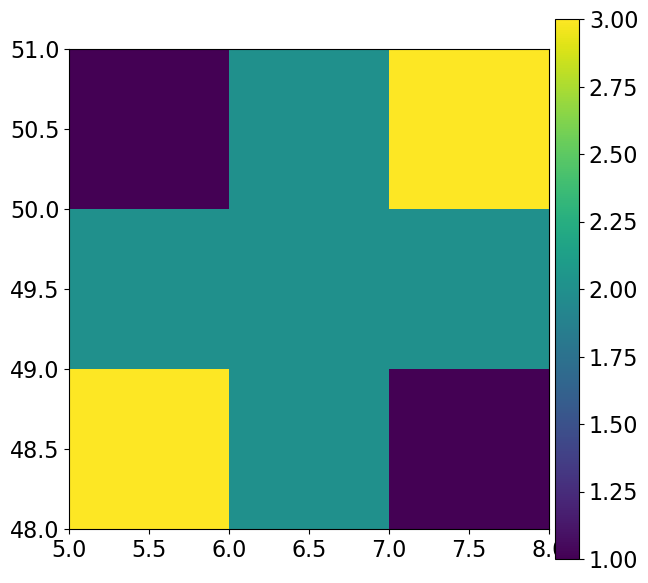

In [3]:
axh = gk.drawRaster(ras, srs=gk.srs.EPSG4326, figsize=(6, 6))
plt.show()

In [4]:
# extract matrix
gk.raster.extractMatrix(ras)

array([[1, 2, 3],
       [2, 2, 2],
       [3, 2, 1]])

## Extract value from a raster

In [5]:
# extract value at a given location by interpolating
from geokit.get_test_data import get_test_data
import pathlib

data_cache_folder = pathlib.Path().cwd().parent.joinpath("data")

value_near = gk.raster.interpolateValues(
    source=get_test_data(
        file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder
    ),
    points=[(5.6, 51.1), (5.7, 51.1), (5.8, 51.1)],
)
print(value_near)


value_interp = gk.raster.interpolateValues(
    source=get_test_data(
        file_name="gsa-ghi-like.tif", data_cache_folder=data_cache_folder
    ),
    points=[(5.6, 51.1), (5.7, 51.1), (5.8, 51.1)],
    mode="linear-spline",
)
print(value_interp)

[2.927 2.936 2.948]
[2.926      2.93450004 2.94799995]


## Polygonize a raster 
Poligonize a raster xyz with 'gk.raster.polygonizeRaster(xyz)'.

In [6]:
# polygonize a raster
ras_boolean = gk.raster.createRasterLike(source=ras, data=raster_matrix == 2)

polygonized_geoms = gk.raster.polygonizeRaster(ras_boolean)

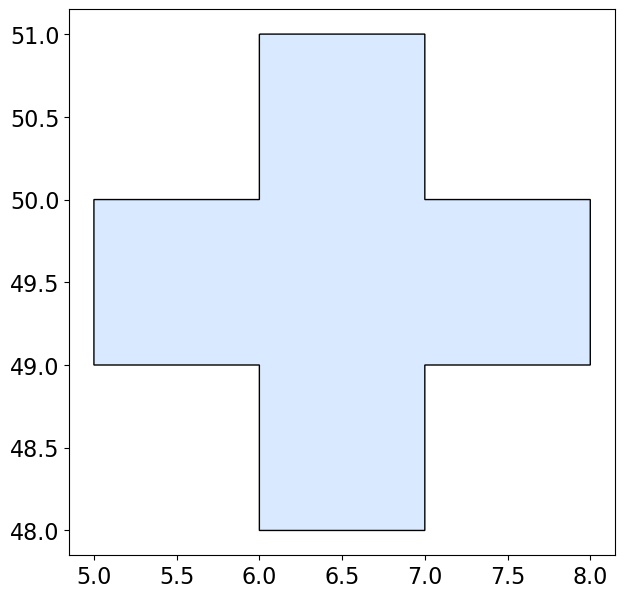

In [7]:
# draw polygonized geom
gk.drawGeoms(polygonized_geoms.geom[polygonized_geoms.value == 1], figsize=(6, 6))
plt.show()

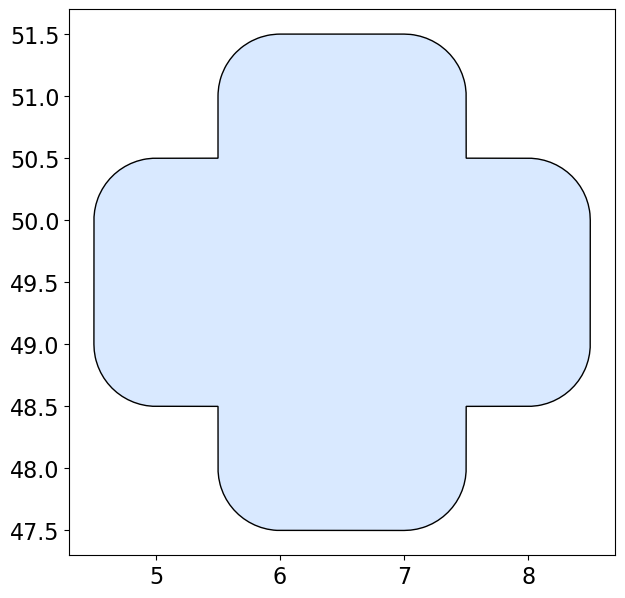

In [8]:
# draw polygonized geom with buffer
gk.drawGeoms(
    polygonized_geoms.geom[polygonized_geoms.value == 1].iloc[0].Buffer(0.5),
    figsize=(6, 6),
)
plt.show()

## Warp raster

AxHands(ax=<Axes: >, handles=<matplotlib.image.AxesImage object at 0x00000241AFD0A200>, cbar=<matplotlib.colorbar.Colorbar object at 0x00000241AFECC130>)

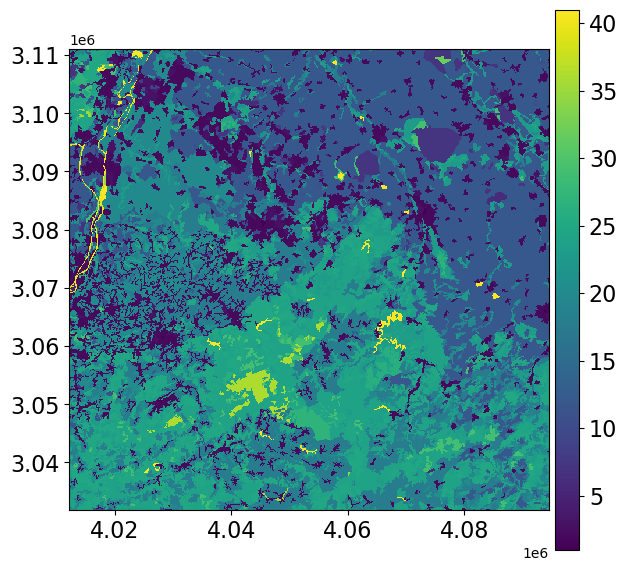

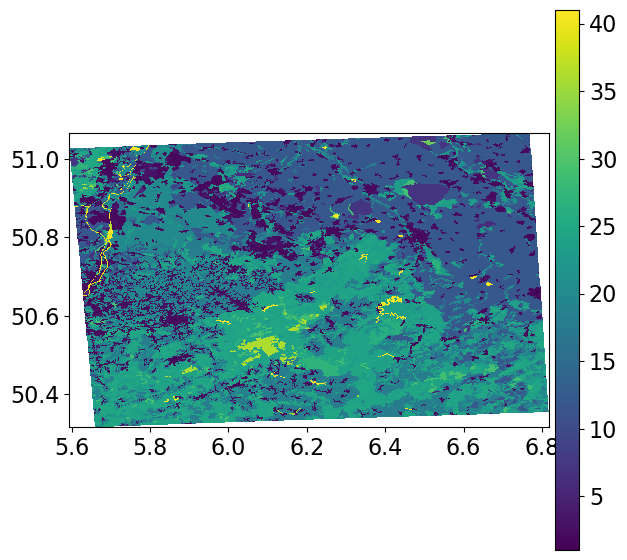

In [10]:
# Warp
path_to_sample_raster_data = get_test_data(
    file_name="clc-aachen_clipped.tif", data_cache_folder=data_cache_folder
)
gk.drawRaster(
    path_to_sample_raster_data,
    figsize=(6, 6),
)
warped_raster = gk.raster.warp(
    path_to_sample_raster_data,
    srs=gk.srs.EPSG4326,
    resampleAlg="near",
)

gk.drawRaster(warped_raster, figsize=(6, 6))